In [1]:
 import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

# data cleaning

In [ ]:
# This section entails reading and cleaning several CSV files for analysis and reading them into
Dataframes. The CSV files contain data on whale portfolio returns, algorithmic trading portfolio
returns, and S&P 500 historical prices. After cleaning, the data frames will be combined into a
single Dataframe.

# whale returns

In [ ]:
# Read the Whale portfolio daily returns and clean the data

In [2]:
 #Read whale returns
whale_returns_df= pd.read_csv('whale_returns.csv')
whale_returns_df['Date']=pd.to_datetime(whale_returns_df['Date'], dayfirst=True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
 #count nulls
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
 #drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

# algorithmic dailily return

In [ ]:
# Read the Algorithmic portfolio daily returns and clean the data

In [5]:
 #Read algorithmic returns
algo_returns_df= pd.read_csv('algo_returns.csv')
algo_returns_df['Date']=pd.to_datetime(algo_returns_df['Date'], dayfirst=True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
 #count nulls
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
 #drop nulls
algo_returns_df.dropna()
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

# S&P daily returns

In [ ]:
# Read the S&P 500 historical closing prices and create new daily returns dataframe

In [8]:
#Read S&P 500 closing prices
sp500_history_df = pd.read_csv('sp500_history.csv')
sp500_history_df['Date']=pd.to_datetime(sp500_history_df['Date'], dayfirst=True)
sp500_history_df.set_index(sp500_history_df['Date'], inplace=True)
sp500_history_df.drop(columns=['Date'], inplace=True)
sp500_history_df['Close']=sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close']
sp500_history_df = sp500_history_df.sort_values("Date", ascending=True)
sp500_history_df.head()

/var/folders/hq/qm8_fgxd72z2kpvb72304z4r0000gn/T/ipykernel_21591/2557550488.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['Close']=sp500_history_df['Close'].str.replace('$','')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [9]:
#Check data types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
#Fix the data types
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [12]:
#Count nulls
sp500_history_df.isna().sum()

Close    0
dtype: int64

In [13]:
#Calculate the daily returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
#Drop nulls
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
#Rename column to be specific to this portfolio
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "S&P500"})
sp500_returns_df.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


# 1.4 Combine Whale, Algorithmic, and S&P 500 Returns

In [ ]:
# Join all the Dataframes into a single Datafrme with the columns showing the returns for each
portfolio

In [105]:
 #Join all dataframes into a single dataframe
combined_portfolios_df = pd.concat([whale_returns_df, algo_returns_df,
  sp500_returns_df], axis = 'columns', join = 'inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# 2 Portfolio Analysis

In [ ]:
# This section entails calculating and visualizing performance adn risk metrics for all the portfolios

# 2.1 performance analysis 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

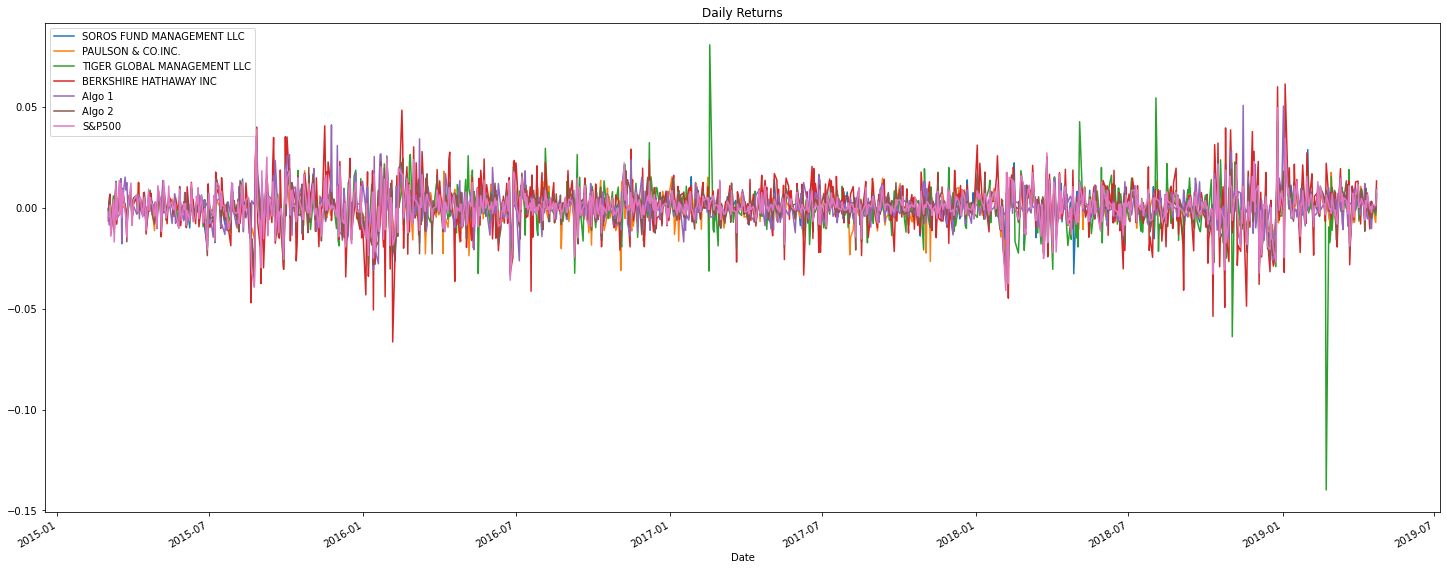

In [21]:
 #Plot daily returns
combined_portfolios_df.plot( title = "Daily Returns", figsize = (25,10))

In [22]:
#Calculate cumulative returns for all portfolios
cumulative_returns = (1+combined_portfolios_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

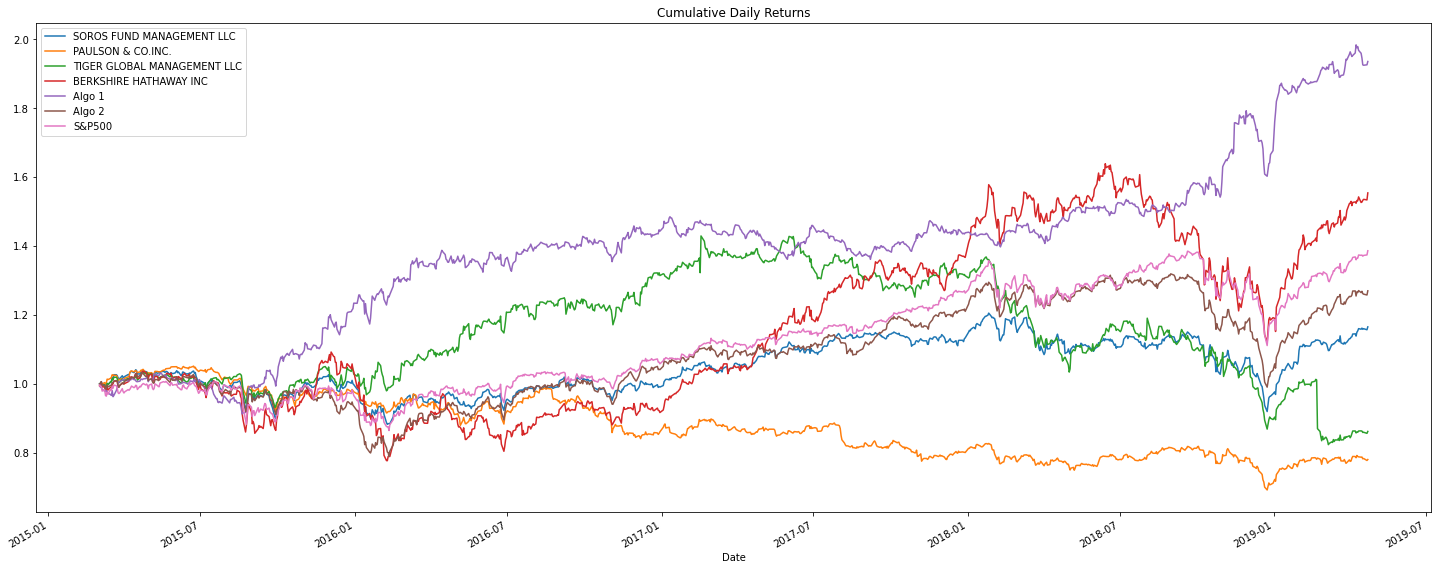

In [23]:
#Plot cumulative returns for all portfolios
cumulative_returns.plot( title = "Cumulative Daily Returns", figsize = (25,10))

In [ ]:
# Comparing the portfolios in the performance chart above shows that only Algo 1 and Berkshire
Hathaway Inc. outperform the S&P 500

# 2.2 risk analysis 

In [ ]:
#Determine the risk of each portfolio 1. Create a box plot for each of the returns. 2. Calculate the
standard deviation for each portfolio. 3. Determine which portfolios are riskier than the S&P 500.
4.Calculate the annualized standard deviation

<AxesSubplot:title={'center':'Portfolio Risk'}>

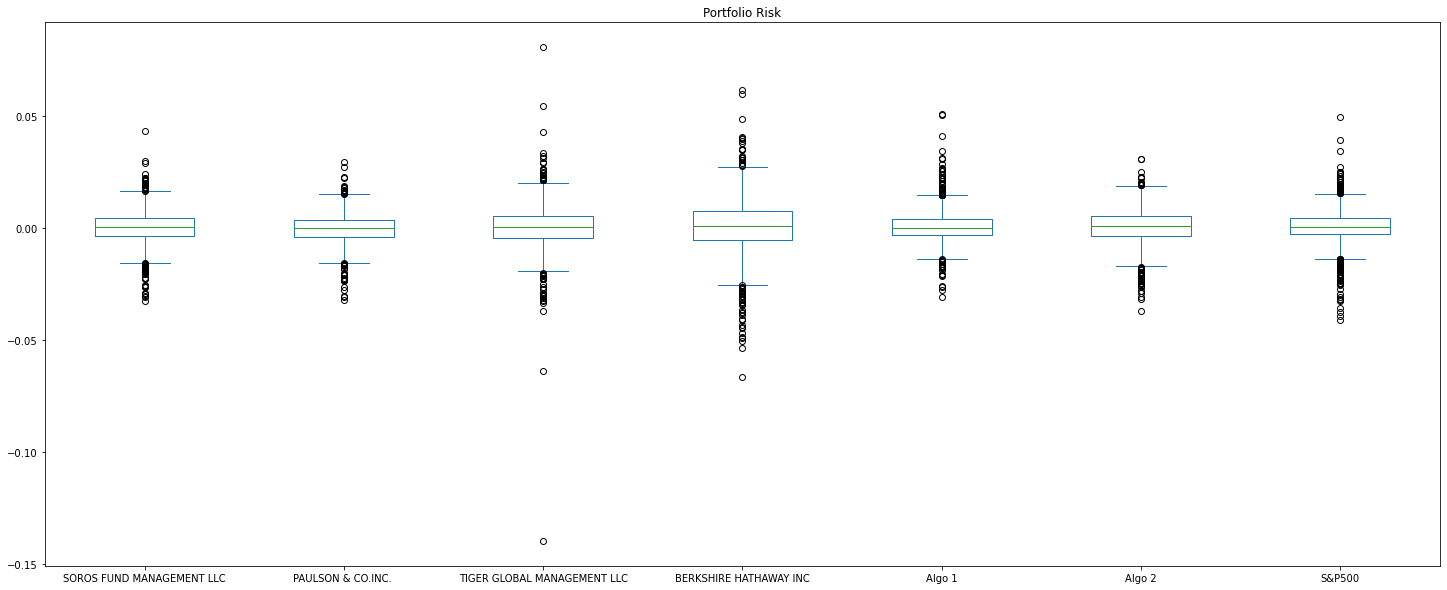

In [24]:
 #Create a box plot for each of the returns
combined_portfolios_df.plot.box(title = "Portfolio Risk", figsize = (25,10))

In [25]:
#Calculate the standard deviation for each portfolio
daily_stdev = combined_portfolios_df.std().sort_values(ascending = False)
daily_stdev

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [26]:
#Determine which portfolios are riskier than the S&P 500
highrisk_portfolios = [daily_stdev > daily_stdev['S&P500']]
highrisk_portfolios

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 S&P500                         False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

In [27]:
 #Calculate the annualized standard deviation (1 year = 252 trading days)
annual_stdev = daily_stdev * np.sqrt(252)
annual_stdev.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

# rolling statistics

In [ ]:
# Analyze the rolling statistics for risk and beta to determine how risk changes over time 1.Calculate
and plot the rolling standard deviation for all portfolios, using a 21-day window. 2. Calculate and
plot the correlation between each stock to determine which portfolios mimic the S&P 500. 3.
Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and
the S&P 500.

<AxesSubplot:title={'center':'21-Day Rolling, Standard Deviation'}, xlabel='Date'>

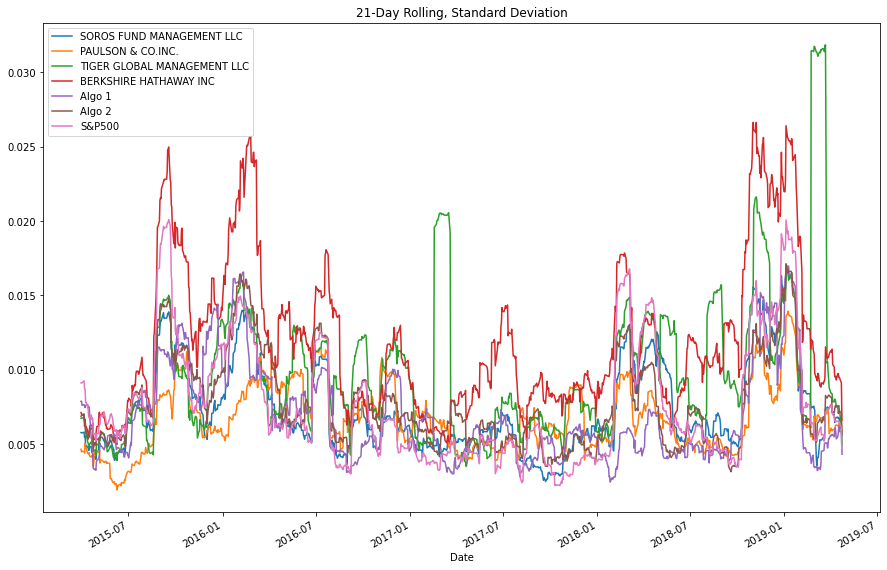

In [39]:
#Calculate and plot the rolling standard deviation for all portfolios, using a,  21-day window
combined_portfolios_df.rolling(window=21).std().plot(title = "21-Day Rolling, Standard Deviation",  figsize=(15,10))

In [41]:
 #Calculate the correlation between each stock to determine which portfolios  ,mimic the S&P 500
correlation = combined_portfolios_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

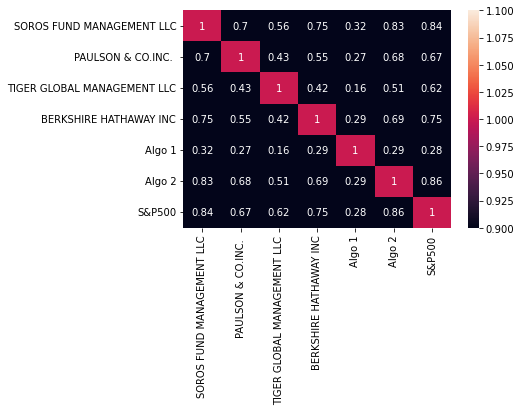

In [42]:
 #Plot the correlation
sns.heatmap(correlation, vmin=1, vmax=1, annot= True)

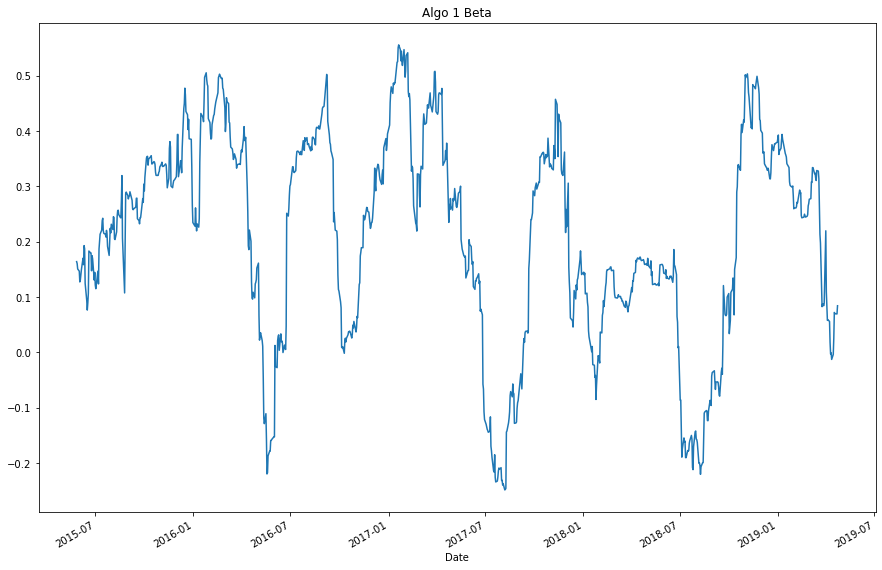

In [65]:
 #Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P 500.
#calculate the covariance for all daily returbs vs S&P500
algo1_covariance = combined_portfolios_df['Algo 1'].rolling(window=60).  cov(combined_portfolios_df['S&P500'])
algo1_covariance
#calculate the variance of all daily returns vs S&P500
variance = combined_portfolios_df['S&P500'].rolling(window=60).var()
variance
#calculate the beta for all the daily returns
algo1_beta = algo1_covariance/variance
algo1_beta_plot = algo1_beta.plot(title = "Algo 1 Beta", figsize = (15,10))

# rolling statistics challenge Exponentially Weighted Average

In [ ]:
# An alternative method to calculate a rolling window is to find the exponentially weighted moving
average. This is like a moving window average, but it assigns greater importance to more recent
observations.Try calculating the ewm with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

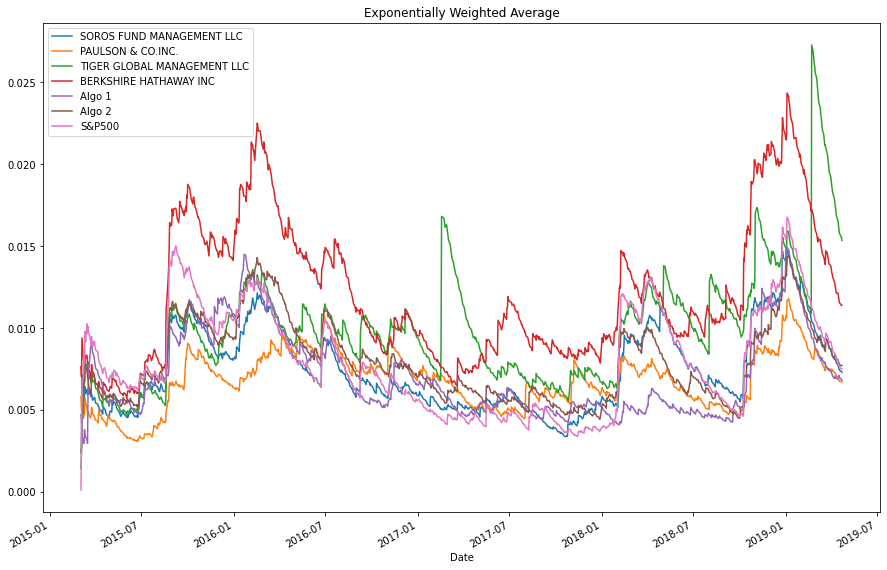

In [66]:
#calculate a rolling window using exponentially weighted moving average
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std()
rolling_window_ewma.plot(title = "Exponentially Weighted Average", figsize =   (15,10))

# 2.5 Sharpe Ratios

In [ ]:
# Investment managers and their institutional investors look at the return-to-risk ratio, not just the
returns. After all, if you have two portfolios that each offer a 10% return, yet one is lower risk,
you would invest in the lower-risk portfolio, right? Follow these steps: 1. Using the daily returns,
calculate the Sharpe ratios and visualize them in a bar plot.2. Determine whether the algorithmic
strategies outperform both the market (S&P 500) and the whales portfolios.

In [67]:
 #Using the daily returns, calculate the Sharpe ratios
sharpe_ratios = (combined_portfolios_df.mean()*252) / (combined_portfolios_df.  std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

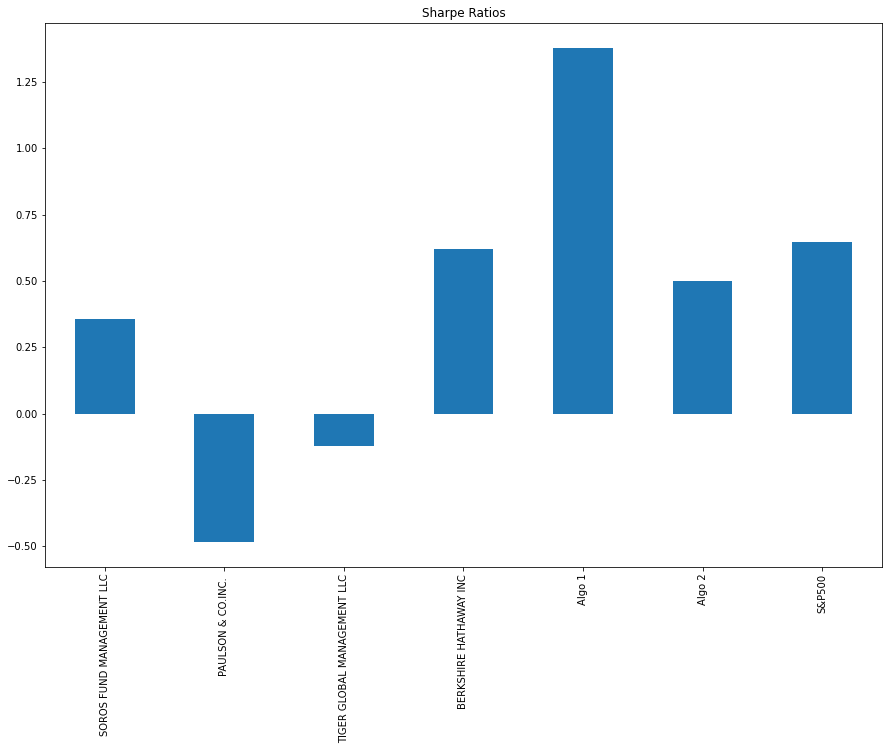

In [68]:
#visualize sharpe ratios in a bar plot
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios", figsize=(15,10))

In [69]:
#Algo 1 performance compared to the market (S&P500) and the whales portfolio
algo1_performance =[sharpe_ratios['Algo 1'] > sharpe_ratios]
algo1_performance

[SOROS FUND MANAGEMENT LLC       True
 PAULSON & CO.INC.               True
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 Algo 1                         False
 Algo 2                          True
 S&P500                          True
 dtype: bool]

In [70]:
 #Algo 2 performance compared to the market (S&P500) and the whales portfolio
algo2_performance =[sharpe_ratios['Algo 2'] > sharpe_ratios]
algo2_performance

[SOROS FUND MANAGEMENT LLC       True
 PAULSON & CO.INC.               True
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC         False
 Algo 1                         False
 Algo 2                         False
 S&P500                         False
 dtype: bool]

In [ ]:
# Therefore, we can see that Algo 1 strategy outperforms the S&P 500 and the whales portfolio.
However, Algo 2 does not outperform the S&P 500 and Berkshire Hathaway but outperforms the
remaining whales portfolios: Soros Fund Management LLC, Paulson & Co. Inc., and Tiger Global
Management LLC

# 3 custom portfolio 

In [ ]:
# You’re excited that you were able to prove that the algorithmic trading portfolios are doing so well
compared to the market and whales portfolios. However, now you are wondering whether you can
choose your own portfolio that performs just as well as the algorithmic portfolios. Investigate by
doing the following: 1. Use Google Sheets and its built-in GOOGLEFINANCE function to choose
3–5 stocks for your portfolio. NOTE In the Resources folder, you’ll find CSV files for AAPL, COST
and GOOG. These are provided as backup in the event that the GOOGLEFINANCE function is
not working properly. 2. Download the data as CSV files and calculate the portfolio returns
3. Calculate the weighted returns for your portfolio, assuming equalnumber of shares per stock.
4. Add your portfolio returns to the DataFrame with the other portfolios 5. Run the following
analyses: Calculate the annualized standard deviation. Calculate and plot the rolling standard
deviation with a 21-day window. Calculate and plot the correlation. Calculate and plot beta for
your portfolio compared to the S&P 60 TSX. Calculate the Sharpe ratios and generate a bar plot.
How does your portfolio perform?

In [71]:
#Read each of the three stocks
#Read the first stock
aapl_history_df = pd.read_csv("aapl_historical.csv", index_col = "Trade DATE",
  parse_dates = True, infer_datetime_format = True)
aapl_history_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [72]:
#Read the second stock
cost_history_df = pd.read_csv("cost_historical.csv", index_col = "Trade DATE",
parse_dates = True, infer_datetime_format = True)
cost_history_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [73]:
 #Read the third stock
goog_history_df = pd.read_csv("goog_historical.csv", index_col = "Trade DATE",
parse_dates = True, infer_datetime_format = True)
goog_history_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [79]:
#concatenate all the Dataframes into a single Dataframe
my_combinedportfolio_df = pd.concat([aapl_history_df, cost_history_df,  
goog_history_df], axis="columns", join="inner")
my_combinedportfolio_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [80]:
 #sort datetime index in ascending order (past to the present)
my_combinedportfolio_df.sort_index(inplace=True)
#drop symbol columns
my_combinedportfolio_df.drop ('Symbol', inplace=True, axis=1)
my_combinedportfolio_df

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [81]:
#Set new column names
my_combinedportfolio_df.columns = ['AAPL', 'COST', 'GOOG']
my_combinedportfolio_df= my_combinedportfolio_df.rename_axis('Date')
my_combinedportfolio_df.head()

,AAPL,COST,GOOG
Date,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


# 3.0.1 Portfolio Returns

In [82]:
#calculate percentage returns
my_combinedportfolio_returns = my_combinedportfolio_df.pct_change()

In [83]:
#Drop nulls
my_combinedportfolio_returns.dropna(inplace=True)
my_combinedportfolio_returns.head()

,AAPL,COST,GOOG
Date,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


# 3.0.2 Weighted Returns Assuming an Equal Number of Shares

In [86]:
 #calculate the weighted returns
weights = [1/3, 1/3, 1/3]
my_combinedportfolio_weighted_returns = my_combinedportfolio_returns. dot(weights)
my_combinedportfolio_weighted_returns.head()
my_combinedportfolio_weighted_returns = my_combinedportfolio_weighted_returns. rename("Custom Portfolio")
my_combinedportfolio_weighted_returns.head()

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
Name: Custom Portfolio, dtype: float64

# 3.0.3 Add Custom Portfolio Returns to the Larger Dataframe With Other Portflios

In [88]:
 #Add custom portfolio to the larger Dataframe
combined_portflios_2_df = pd.concat([whale_returns_df, algo_returns_df, 
sp500_returns_df, my_combinedportfolio_weighted_returns], axis = 'columns', join='inner')
combined_portflios_2_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


# 3.0.4 Run the Following Analysis

In [ ]:
# 1. Calculate the annualized standard deviation.

In [89]:
#daily standard deviation
daily_std_deviation = combined_portflios_2_df.std().sort_values(ascending =False)
daily_std_deviation
#annualized standard deviation (1 year = 252 trading days)
annual_std_deviation = daily_std_deviation * np.sqrt(252)
annual_std_deviation

BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
Custom Portfolio               0.211496
S&P500                         0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

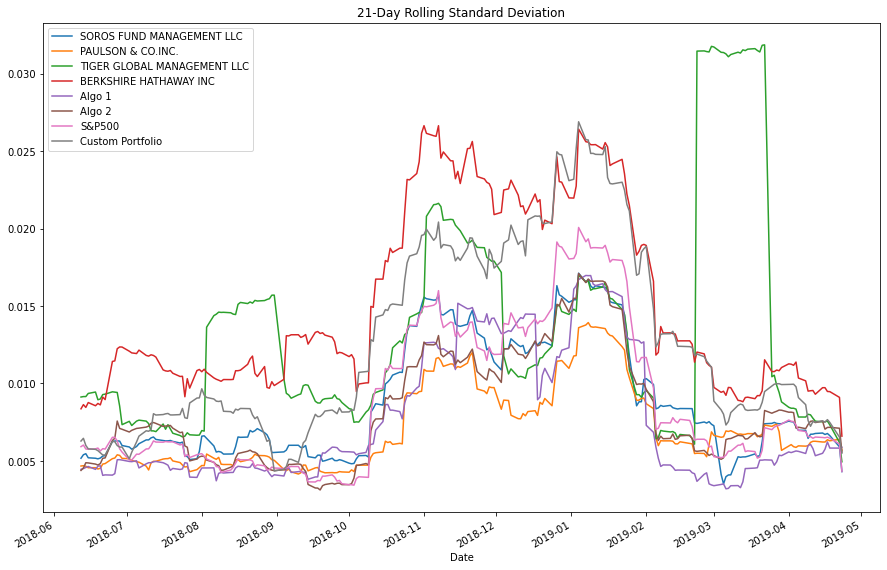

In [92]:
#Rolling standard deviation
rolling_std_deviation = combined_portflios_2_df.rolling(window=21).std()
rolling_std_deviation.plot(title = "21-Day Rolling Standard Deviation", figsize= (15,10))

In [93]:
#Correlation between each stock
correl = combined_portflios_2_df.corr()
correl

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<AxesSubplot:>

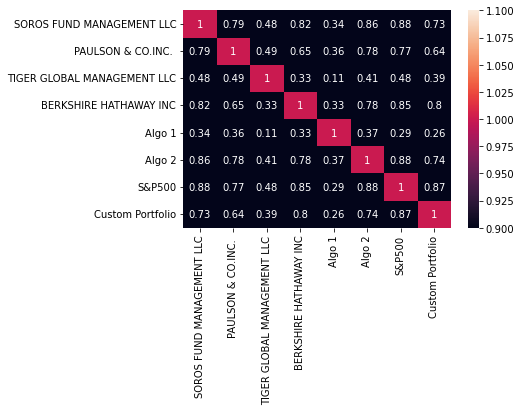

In [94]:
 #plot correlation
sns.heatmap(correl, vmin=1, vmax=1, annot=True)

In [ ]:
# 4. Calculate and plot beta for your portfolio compared to the S&P 60 TSX.

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

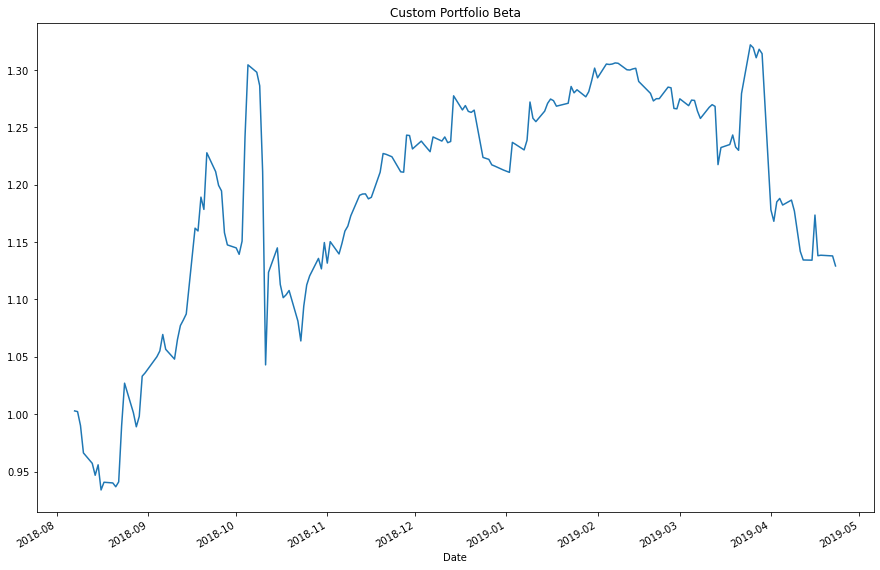

In [101]:
 ##calculate the covariance of all daily returns vs S&P 500
custom_covariance = combined_portflios_2_df['Custom Portfolio']. rolling(window=60).cov(combined_portflios_2_df['S&P500'])
custom_covariance
#calculate the variance of all daily returns vs S&P 500
custom_variance = combined_portflios_2_df['S&P500'].rolling(window=60).var()
custom_variance
#calculate the beta for all daily returns
custom_beta = custom_covariance / custom_variance
custom_beta
custom_beta.plot(title = "Custom Portfolio Beta", figsize = (15,10))

In [ ]:
# 5. Calculate the Sharpe ratios and generate a bar plot.

In [103]:
#sharpe ratios
sharpe_ratios_2 = (combined_portflios_2_df.mean()*252) /  (combined_portflios_2_df.std()*np.sqrt(252))
sharpe_ratios_2.sort_values(ascending = False)

Algo 1                         2.035665
Custom Portfolio               0.933123
S&P500                         0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

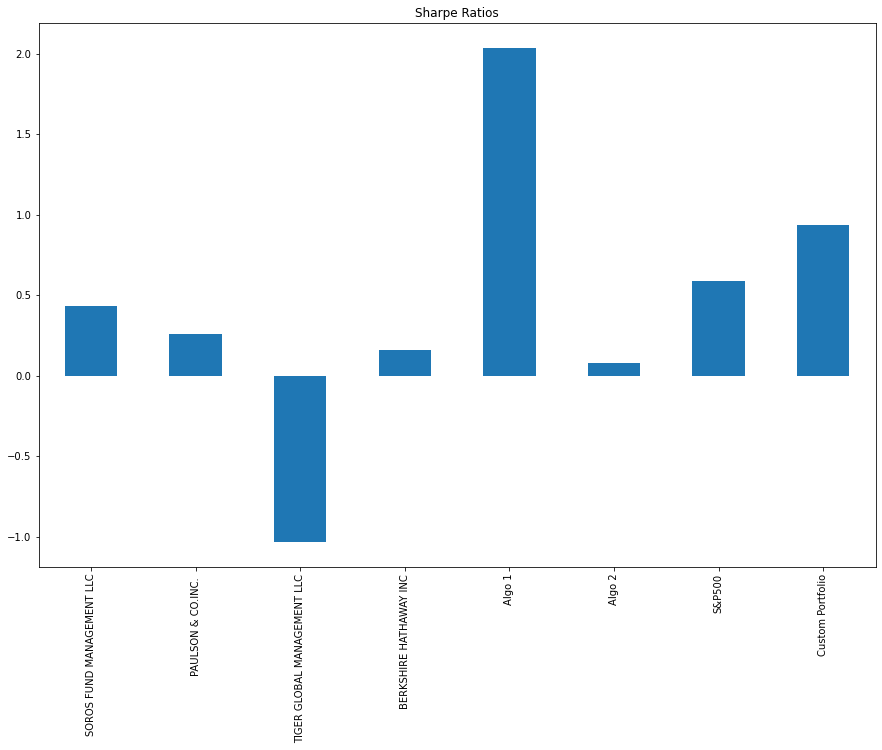

In [104]:
 #plot sharpe ratios in a bar plot
sharpe_ratios_2.plot (kind = "bar", title = "Sharpe Ratios", figsize=(15,10))